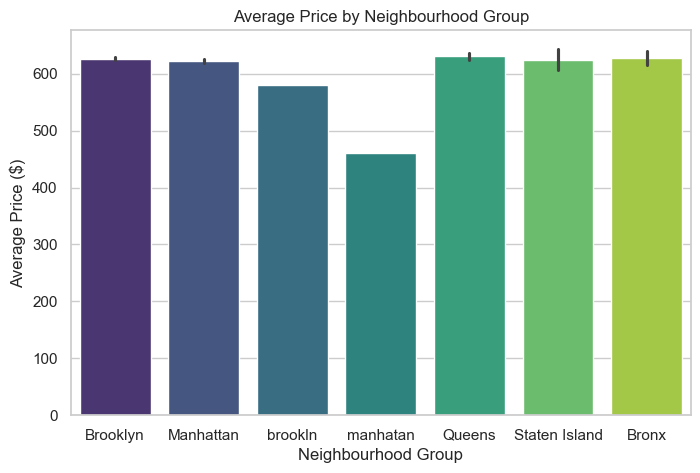

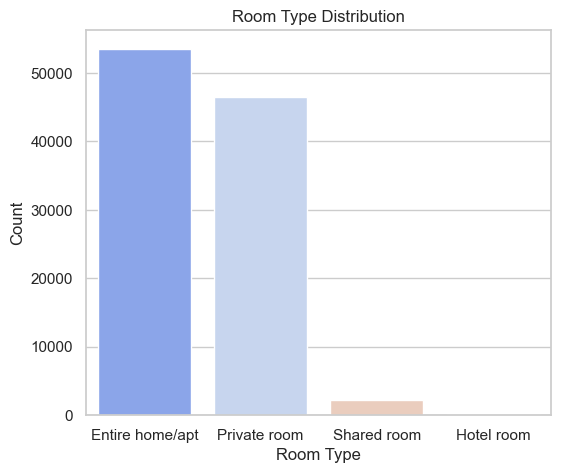

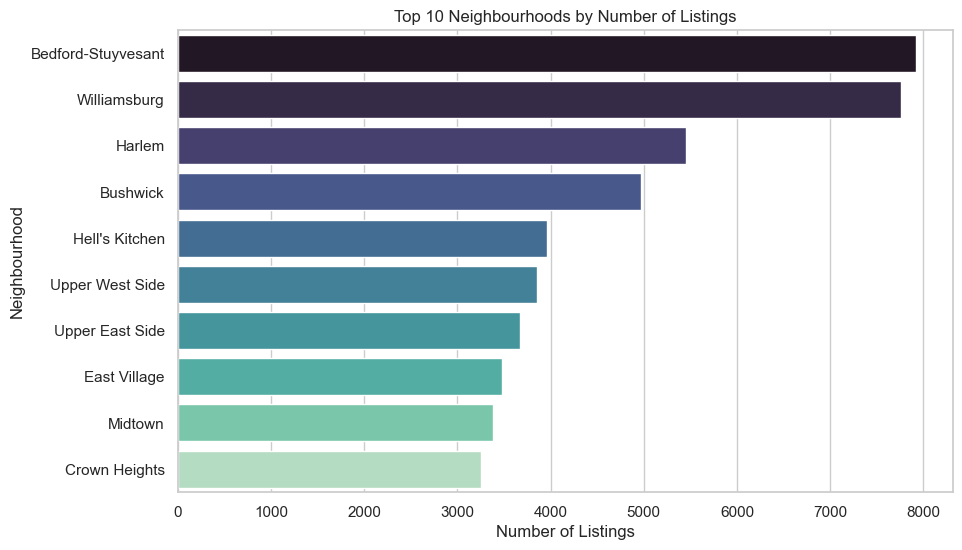


✅complete: Graphs generated successfully!


In [14]:

# Airbnb Analysis: Graphical Representations

import seaborn as sns

# Reload cleaned dataset
df = pd.read_csv("airbnb_cleaned.csv")

# --- 1. Average Price by Neighbourhood Group ---
if "neighbourhood_group" in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x="neighbourhood_group", y="price", data=df, estimator=np.mean, palette="viridis")
    plt.title("Average Price by Neighbourhood Group")
    plt.ylabel("Average Price ($)")
    plt.xlabel("Neighbourhood Group")
    plt.show()
elif "neighbourhood group" in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x="neighbourhood group", y="price", data=df, estimator=np.mean, palette="viridis")
    plt.title("Average Price by Neighbourhood Group")
    plt.ylabel("Average Price ($)")
    plt.xlabel("Neighbourhood Group")
    plt.show()

# --- 2. Room Type Distribution ---
if "room_type" in df.columns:
    plt.figure(figsize=(6,5))
    sns.countplot(x="room_type", data=df, palette="coolwarm", order=df["room_type"].value_counts().index)
    plt.title("Room Type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Room Type")
    plt.show()
elif "room type" in df.columns:
    plt.figure(figsize=(6,5))
    sns.countplot(x="room type", data=df, palette="coolwarm", order=df["room type"].value_counts().index)
    plt.title("Room Type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Room Type")
    plt.show()

# --- 3. Availability vs Price (Scatter Plot) ---
if "availability_365" in df.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(df["availability_365"], df["price"].clip(upper=1000), alpha=0.4, c="teal")
    plt.title("Availability vs Price")
    plt.xlabel("Availability (days per year)")
    plt.ylabel("Price ($)")
    plt.show()

# --- 4. Top 10 Neighbourhoods by Listings ---
if "neighbourhood" in df.columns:
    top_neigh = df["neighbourhood"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_neigh.values, y=top_neigh.index, palette="mako")
    plt.title("Top 10 Neighbourhoods by Number of Listings")
    plt.xlabel("Number of Listings")
    plt.ylabel("Neighbourhood")
    plt.show()

print("\n✅complete: Graphs generated successfully!")


Using features: ['neighbourhood']
Model Test R^2 Score: -0.001

Top 10 Important Features:
 neighbourhood_Richmond Hill         0.021488
neighbourhood_Washington Heights    0.018093
neighbourhood_Jamaica Hills         0.016327
neighbourhood_Inwood                0.015442
neighbourhood_Columbia St           0.014682
neighbourhood_Marble Hill           0.013992
neighbourhood_East Elmhurst         0.013887
neighbourhood_Castleton Corners     0.013503
neighbourhood_Lighthouse Hill       0.013008
neighbourhood_Navy Yard             0.012583
dtype: float64


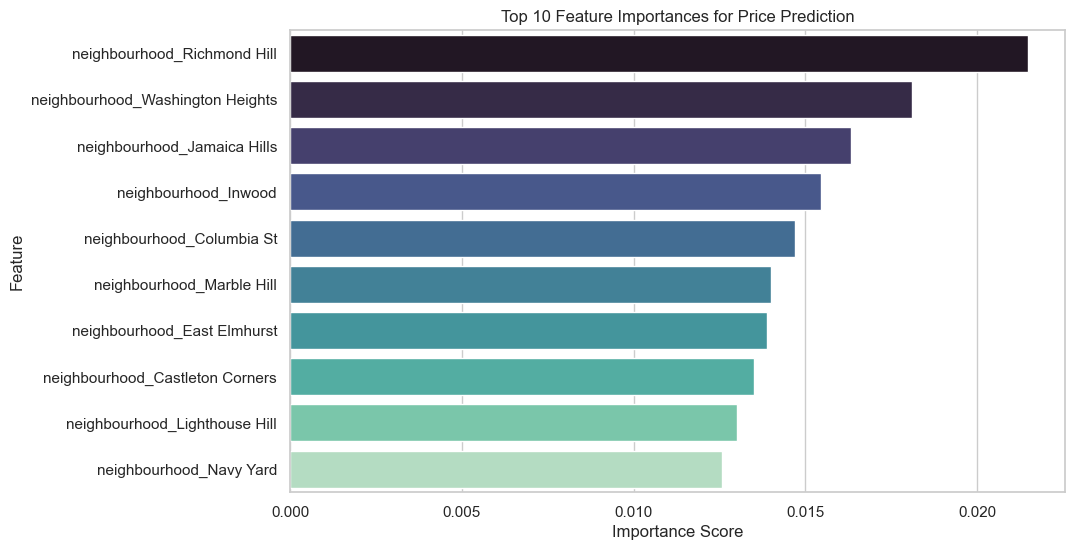

No availability_365 column — skipping revenue estimation

✅complete: Feature importance & revenue visualized + saved.


In [17]:

# Airbnb Analysis: Feature Importance + Revenue Estimation (with Visualization)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load cleaned data
df = pd.read_csv("airbnb_cleaned.csv")

# Features for price prediction
features = []
for f in ['room_type','neighbourhood_group','neighbourhood',
          'minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365']:
    if f in df.columns:
        features.append(f)

print("Using features:", features)

X = df[features].copy()
y = df["price"]

# One-hot encode categorical variables
X_enc = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

print("Model Test R^2 Score:", round(rf.score(X_test, y_test), 3))

# --- Feature Importances ---
importances = pd.Series(rf.feature_importances_, index=X_enc.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", importances.head(10))

# Graph 1: Top 10 Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="mako")
plt.title("Top 10 Feature Importances for Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# --- Revenue Estimation ---
if "availability_365" in df.columns:
    df["estimated_nights_booked"] = (365 - df["availability_365"]).clip(lower=0)
    df["revenue_estimate"] = df["price"] * df["estimated_nights_booked"]

    rev_summary = df.groupby(["neighbourhood_group","room_type"]).agg(
        total_listings=("id","count"),
        avg_price=("price","mean"),
        total_revenue=("revenue_estimate","sum")
    ).reset_index().sort_values("total_revenue", ascending=False)

    print("\nRevenue Summary by Neighbourhood Group & Room Type:\n", rev_summary.head(10))

    # Graph 2: Revenue by Neighbourhood Group & Room Type
    plt.figure(figsize=(12,6))
    sns.barplot(data=rev_summary.head(10),
                x="total_revenue", y="neighbourhood_group", hue="room_type", palette="viridis")
    plt.title("Top Neighbourhood Groups & Room Types by Revenue")
    plt.xlabel("Total Revenue ($)")
    plt.ylabel("Neighbourhood Group")
    plt.legend(title="Room Type")
    plt.show()

    # Graph 3: Average Price vs Total Listings
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=rev_summary, x="avg_price", y="total_listings", hue="neighbourhood_group", size="total_revenue", sizes=(50, 500), alpha=0.7)
    plt.title("Listings vs Avg Price (Bubble size = Revenue)")
    plt.xlabel("Average Price ($)")
    plt.ylabel("Total Listings")
    plt.show()
else:
    print("No availability_365 column — skipping revenue estimation")

# Save updated data
df.to_csv("airbnb_revenue.csv", index=False)
print("\n✅complete: Feature importance & revenue visualized + saved.")
